

1.   Need function to download all coments and maybe other dataNeed function to download all coments and maybe other data
2.   Remove more bots (maybe learn it) + remove coments with lexic
3. Search and count words/ features in Comments
4. Mark all comments and make sistem for filtering it, maybe use LDA and tfidf on subset, add probability to themes and filter it



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
project_dir = '/content/gdrive/My Drive/ColabNotebooks/Politologia/FinalRes/' # Denis path '/content/gdrive/My Drive/ColabNotebooks/Politologia/'
import sys
sys.path.insert(0, project_dir)

In [ ]:
import pandas as pd
import pickle

# Remove bots and mark comment type
0 - normal, 1 - liked, 2 - bots (also could mark coments on bots replyes)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# Clean Likes and Replays

df = pd.read_excel(project_dir + 'Dud166k_191024_0100.xlsx')

n = []
for index, row in df.iterrows():
  try:
    #print(l[1][1], l[1])
    int(row['Likes'])
    int(row['Reply count'])
  except ValueError:
    #print(i, end=',')
    repl = row['Comment updated']
    x = list(df.loc[index, ['Likes', 'Comment created', 'Comment updated', 'Reply count']])
    df.loc[index, ['Comment created', 'Comment updated', 'Reply count', 'ParentID']] = x
    #df.loc[index, ['Comment created', 'Comment updated', 'Reply count', 'ParentID']] = df.loc[index, ['Likes', 'Comment created', 'Comment updated', 'Reply count']]
    df.loc[index, ["Likes"]] = int(df["Comment Text"][index].split('\"')[-1])
    n.append(index)

df[["Likes", "Reply count"]] = df[["Likes", "Reply count"]].astype(int)


In [ ]:
len(df) # общее количесвто комментариев

166700

Most often Autor appears: 2347.0


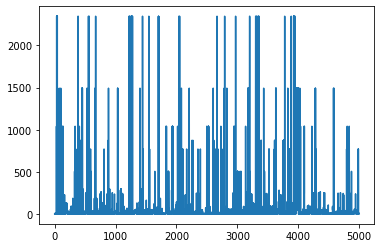

In [ ]:
#plt.ylim(1000)
maxn_com = 50
print('Most often Autor appears:', df.groupby('Author Name')["Author Channel ID"].transform('count').max())
fakedf = df[df.groupby('Author Name')["Author Channel ID"].transform('count') > maxn_com] # take only autors with more then 50 appears - assume it is bots
df.groupby('Author Name')["Author Channel ID"].transform('count')[:5000].plot()  # avery where "author name" sub vs Author Channel ID

In [ ]:
df['occurs'] = df.groupby('Author Name')["Author Channel ID"].transform('count').dropna()

In [ ]:
print("Number of authors names:", len(df.drop_duplicates('Author Name')), "\n med with bots and without:",  df['occurs'].median(), df['occurs'][df['occurs'] < 50 ].median())
print('stats with bots\n', df['occurs'].describe())
#Функция std() вычисляет среднеквадратичное (стандартное) отклонение значений элементов массива.
#

print('\nstats without bots')
df['occurs'][df['occurs'] < 50 ].describe()

Number of authors names: 81983 
 med with bots and without: 3.0 2.0
stats with bots
 count    166689.000000
mean         76.792788
std         327.844186
min           1.000000
25%           1.000000
50%           3.000000
75%          13.000000
max        2347.000000
Name: occurs, dtype: float64

stats without bots


count    147899.000000
mean          6.434208
std           9.641352
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max          49.000000
Name: occurs, dtype: float64

Text(0.5, 1.0, 'Name')

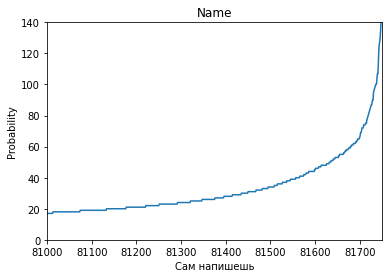

In [ ]:
#plt.plot(sorted(df.drop_duplicates('Author Name')['occurs'])[60000::81600])
plt.plot(sorted(df.drop_duplicates('Author Name')['occurs']))#[81000:81750])
plt.xlim(81000, 81750) # Change diapason
plt.ylim(0, 140)
plt.xlabel('Сам напишешь') #
plt.ylabel('Probability')
plt.title('Name')

In [ ]:
df_double_name = df.drop_duplicates(subset="Author Name")[df.drop_duplicates(subset="Author Name").groupby("Author Channel ID")["Author Name"].transform('count') == 2].sort_values('Author Channel ID')


In [ ]:
a = sum(fakedf.assign(name2=fakedf["Author Channel ID"].isin(df_double_name["Author Channel ID"]).astype(int)).drop_duplicates(subset="Author Name")['name2'])
b = len(df_double_name)
c = sum(fakedf["ParentID"].notnull())
print('ids more then 50 times occur:', sum(df.drop_duplicates('Author Name')['occurs'] > 50))
print("\naccount with double names: ", b, "\nbots of this accounts: ", a, '\nall bots with replay and coments > ', maxn_com, 'is ', len(fakedf), '\nbots only replays', sum(fakedf["ParentID"].notnull()))

ids more then 50 times occur: 137

account with double names:  38 
bots of this accounts:  0 
all bots with replay and coments >  50 is  18590 
bots only replays 17625


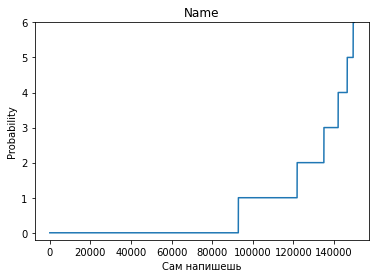

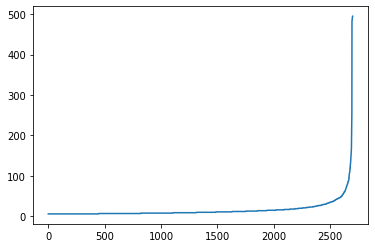

In [ ]:
plt.plot(sorted(df["Likes"].values)[:150000]) # more then 16 000 coments has Likes > 6
plt.ylim(-0.2, 6)
plt.xlabel('Сам напишешь') #
plt.ylabel('Probability')
plt.title('Name')
plt.show()
plt.plot(sorted(df["Reply count"].values)[164000:]) # Only 500 coments more then 20 replays
plt.show()

In [ ]:
maxn_com = 50
df["type"] = 0
df.loc[df.groupby('Author Name')["Author Channel ID"].transform('count') > maxn_com, "type"] = 2
df.loc[df["Likes"] > 6, "type"] = 1

In [ ]:
len(df[df["type"] == 1]) # rand split

15037

## Multiclass text clf
https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f


# Lemmatize all


In [ ]:
!pip install stanza -U

     |████████████████████████████████| 337kB 7.4MB/s 


In [ ]:
import stanza

In [ ]:
stanza.download('ru')
nlp = stanza.Pipeline('ru', models_dir='gdrive/My Drive/ColabNotebooks/Politologia')

2021-06-19 08:49:50 INFO: Downloading default packages for language: ru (Russian)...


2021-06-19 08:51:46 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-06-19 08:51:46 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

2021-06-19 08:51:46 INFO: Use device: cpu
2021-06-19 08:51:46 INFO: Loading: tokenize
2021-06-19 08:51:47 INFO: Loading: pos
2021-06-19 08:51:47 INFO: Loading: lemma
2021-06-19 08:51:47 INFO: Loading: depparse
2021-06-19 08:51:48 INFO: Loading: ner
2021-06-19 08:51:50 INFO: Done loading processors!


## Lemmatize functions

In [ ]:
import re
import gensim
from string import punctuation
import pickle

# Copy past!!! from lower !!!
lemma_dir = '/content/gdrive/My Drive/ColabNotebooks/Politologia/FinalRes/'#Polit102020/'# Sergey '/content/gdrive/My Drive/Politresearch/'
with open(lemma_dir + 'stopwords2.pickle', 'rb') as handle:
    russian_stopwords = pickle.load(handle)

def prepare_data(data): #df[:400][COMENT_COL]
  data_words = []
  for comment in data:

    text = comment
    #print(text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    text = re.sub(":\/\/\S*\s?", " ", text)
    #tmp = []
    #for token in text:
    #  if

    text = gensim.utils.simple_preprocess(text, deacc=True)
    # Maybe remove "No" from stop words??
    text = [token for token in text if token not in russian_stopwords and token.strip() not in punctuation]
    #print(text)
    data_words.append(text)
    #row_text =
  return data_words

In [ ]:
#open(project_dir + "full_data.pickle", 'a').close()

In [ ]:
try:
  with open(project_dir + "full_data.pickle", 'rb') as handle:
      data_words = pickle.load(handle)
except:

  COMENT_COL = "Comment Text"
  %time data_words = prepare_data(df[COMENT_COL])
  with open(project_dir + "full_data.pickle", 'wb') as handle:
        pickle.dump(data_words, handle)


In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        #print(next(doc.iter_words()))

        texts_out.append(" ".join([token.lemma for token in doc.iter_words() if token.upos in allowed_postags]))
    return texts_out

def text_transformer_back_up(comment_column,
                             step=10000,
                             russian_stopwords=russian_stopwords,
                             allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'],
                             path=project_dir + 'lemmas_all.pickle'
                             ):
  try:
    with open(path, 'rb') as handle:
      lemmas = pickle.load(handle)
      print('load success, start from:', len(lemmas), ' step:', step)
  except FileNotFoundError:
    lemmas = []
    print('create new file:', path, ' step:', step)
  while len(lemmas) < len(comment_column):
    lemmas.extend(lemmatization(comment_column[len(lemmas):len(lemmas) + step],
                                  allowed_postags=allowed_postags)
                  )
    with open(path, 'wb') as handle:
      pickle.dump(lemmas, handle)
    print('save succes lenth:', len(lemmas))

12


In [ ]:
df[df['Author Name']=='Тимур Исаев']

,Comment ID,Author Name,Author Channel ID,Comment Text,Likes,Comment created,Comment updated,Reply count,ParentID,occurs,type
632,Ugw-_JzmFz9pKtRfPSF4AaABAg.8uG_U0VQpon8uGaGX7hBvC,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,Зачем далеко ездить? Можно в Волгограде при -1...,0,2019-04-28T11:51:36.000Z,2019-04-28T11:51:36.000Z,0,Ugw-_JzmFz9pKtRfPSF4AaABAg,23.0,0
634,Ugw-_JzmFz9pKtRfPSF4AaABAg.8uG_U0VQpon8uGdJsBEXTp,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@Дядя Федор Крузенштерн бывал по работе зимой ...,0,2019-04-28T12:18:17.000Z,2019-04-28T12:18:17.000Z,0,Ugw-_JzmFz9pKtRfPSF4AaABAg,23.0,0
11118,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uE_j9nDoZZ,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@Илона Романова здравомыслящие есть везде.,0,2019-04-27T17:08:26.000Z,2019-04-27T17:08:26.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11119,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uEezlxziPw,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@From the world of Steampunk забавный дурачок,0,2019-04-27T17:54:23.000Z,2019-04-27T17:54:23.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11121,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uEipykpNqj,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@From the world of Steampunk поясни свою глубо...,0,2019-04-27T18:28:00.000Z,2019-04-27T18:28:00.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11123,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uEmBy97zbk,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,"@From the world of Steampunk я вам, сударь, об...",0,2019-04-27T18:57:21.000Z,2019-04-27T18:57:21.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11125,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uESUE9Y-Pw,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,Совсем дурак? Это животное. Они там дичают и п...,0,2019-04-27T15:56:21.000Z,2019-04-27T15:56:21.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11127,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uGyYrKEJu7,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@From the world of Steampunk сначала про кота....,0,2019-04-28T15:23:49.000Z,2019-04-28T15:25:07.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11128,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uGzVSgonAK,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@From the world of Steampunk касаемо уравниван...,0,2019-04-28T15:32:06.000Z,2019-04-28T15:32:06.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0
11130,UgwctpPVPH9azqd1UNx4AaABAg.8uEPU9FTkA68uHA72VA9HI,Тимур Исаев,UCjCfBEVrPQ6K1a9J4_N_QVQ,@From the world of Steampunk и про год мод мне...,0,2019-04-28T17:13:37.000Z,2019-04-28T17:14:13.000Z,0,UgwctpPVPH9azqd1UNx4AaABAg,23.0,0


# Learning our types

> type 2 - maybe bot, type 1 - like more then 4, type 0 others



Мы выявляли ботов по признаку - количество коментариев и реплаев, если оно было больше порога 50 мы предпологаем, что данного человека можно считать ботом. Почему например не сделать порог 20 - выше преведен пример, где Тимур Исаев за 3 дня пишет 23 реплая. Но как мы видим из графика появлений (occurs) изменение порога не столь существенное, если мы даже ошиблись то запишим или не запишим в боты всего 1000 человек - примерно столько в интервале от 20 ответов до 50, то есть ошибка менее 1%. По этой же причине делать глубокий анализ с подключением других признаков: времени посещения, учета коментария на который был ответ смысла не имеет. Но все же что бы не быть голословными и не судить по единственному примеру, методами машинного обучения мы решили посмотреть насколько отличимы друг от друга 3 группы коментариев (Боты, Лайкнутые, Остальные) и отрегулировать пороги когда считать коментарий принадлижащий той или иной группе в зависимости от качества обучения классификации на эти группы. Более менее ощутимое различие появилось при порогах 50 появлений для группы ботов, и 6 для группы Лайкнутых, как видно лучше всего машина научилась отличать ботов.

In [ ]:
with open(project_dir + 'lemmas_all.pickle', 'rb') as handle:
    lemmas = pickle.load(handle)
df['Lemmas'] = lemmas#text_transformer_back_up(data_words, step=10000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import numpy as np


In [ ]:
X_train, X_test, y_train, y_test = [None] * 4
for i in range(3):
  a, b, c, d = train_test_split(df[df['type']==i]['Lemmas'], df[df['type']==i]['type'], random_state=0, train_size=10000, test_size=3000)
  print(d.shape)
  if X_train is None:
    X_train, X_test, y_train, y_test = a, b, c, d
  else:
    X_train, X_test, y_train, y_test = np.hstack([X_train, a]), np.hstack([X_test, b]), np.hstack([y_train, c]), np.hstack([y_test, d])

(3000,)
(3000,)
(3000,)


In [ ]:
sum(y_test==1)

3000

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', max_features=10000, encoding='latin-1', ngram_range=(1, 2))#, stop_words='english')
features = tfidf.fit_transform(X_train, y_train).toarray()
labels = y_train.astype(int)
features.shape

(30000, 10000)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category_id in ([0,1,2]): #sorted(.items()):
  print(11, category_id)
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category_id))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

11 0
# '0':
  . Most correlated unigrams:
. пригожинский
. убогий
  . Most correlated bigrams:
. пригожинский тролль
. убогий пригожинский
11 1
# '1':
  . Most correlated unigrams:
. пригожинский
. тролль
  . Most correlated bigrams:
. пригожинский тролль
. убогий пригожинский
11 2
# '2':
  . Most correlated unigrams:
. тролль
. убогий
  . Most correlated bigrams:
. пригожинский тролль
. убогий пригожинский


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts, y_train)
clf =  LinearSVC().fit(X_train_tfidf, y_train)#MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
clf.score(X_test_tfidf, y_test)

0.5127777777777778

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(clf.predict(X_test_tfidf), y_test, [0,1,2]))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40      2671
           1       0.53      0.51      0.52      3098
           2       0.64      0.59      0.61      3231

    accuracy                           0.51      9000
   macro avg       0.51      0.51      0.51      9000
weighted avg       0.52      0.51      0.52      9000



## Выкиним ботов.

In [ ]:
len(df[df['type'] != 2])
X_train, X_test, y_train, y_test = train_test_split(df[df['type']!=2]['Lemmas'], df[df['type']!=2]['type'], random_state=0, train_size=50000, test_size=3000)

In [ ]:
# !! This is most important string - we create and learn our tfidf model (on coments without bots)!!
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))#, stop_words='english')
features = tfidf.fit_transform(X_train, y_train).toarray() # here "fit_transform" and below every where just "transform" (fit - mean learning)
labels = y_train.astype(int)
features.shape

(50000, 20115)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for category_id in ([0,1,2,3,4,5,6,7,8]): #sorted(.items()):
  print(11, category_id)
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category_id))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

11 0
# '0':
  . Most correlated unigrams:
. выпуск
. огромный
. человечище
. фильм
. команда
  . Most correlated bigrams:
. хуи убогий
. кремлебот сталинист
. огромный уважение
. выпуск канал
. слеза глаз
11 1
# '1':
  . Most correlated unigrams:
. выпуск
. огромный
. человечище
. фильм
. команда
  . Most correlated bigrams:
. хуи убогий
. кремлебот сталинист
. огромный уважение
. выпуск канал
. слеза глаз
11 2
# '2':
  . Most correlated unigrams:
. корабль
. коптер
. копнуть
. коренной
. ящик
  . Most correlated bigrams:
. король делать
. копаться циферка
. кончить мразь
. коренной население
. коренной народ
11 3
# '3':
  . Most correlated unigrams:
. корабль
. коптер
. копнуть
. коренной
. ящик
  . Most correlated bigrams:
. король делать
. копаться циферка
. кончить мразь
. коренной население
. коренной народ
11 4
# '4':
  . Most correlated unigrams:
. корабль
. коптер
. копнуть
. коренной
. ящик
  . Most correlated bigrams:
. король делать
. копаться циферка
. кончить мразь
. корен

# Marcked data

Здесь мы работаем с размеченной выборкой из 1600 случайно отобранных коментариев. Проблема в том что выборка очень маленькая и не сбалансированная по представленным классам. График прилагается, при обучении видно что модель предсказывает только 4 класса из 7. Первые 2 и последний предсказывает не плохо, а вот 3й не смотря на достаточное присутствие плохо.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
mrkdf = pd.read_excel(project_dir + 'NEURONET/Coments.xlsx')
COMENT_COL = "Comment Text"
THEME_COL =  "Theme"# "T1_9" or "респондент Сергей:"
mrkdf['Theme'] -= 1
mrkdf = mrkdf.dropna()
mrkdf.head()

,Unnamed: 0,n,Comment ID,Author Name,Comment Text,Theme,Likes,Comment created,random,Reply count,Sentiment_prob,Sentiment_cls,Lemmas
0,0,77610,UgxvLWBhE17Z7OJA_tZ4AaABAg,yanazarova,"Юра, очень круто!",6,0,2019-04-26T15:45:50.000Z,0.999996,0,positive,1.000010,юра очень крутой
1,1,78173,UgxW2_cHRlVDjcQ788N4AaABAg,Dariya Barberry,"Юра, спасибо! Такой труд. И за субтитры - от...",6,17,2019-05-12T16:12:20.000Z,0.999991,0,speech,0.984104,юра спасибо таковать труд субтитр отдельный сп...
2,2,2244,Ugw1kzJsH4f1JIC8Ubx4AaABAg,Алекс Иванов,Ком в горле...,1,1,2019-04-24T18:26:36.000Z,0.999971,0,neutral,0.600198,ком горло
3,3,114527,UgyRbVOy_rIOargQxqV4AaABAg,Stanislav Palekha2,В Архангельске на несанкционированном антимусо...,2,2,2019-04-29T00:11:44.000Z,0.999967,0,neutral,0.629785,архангельск антимусорный шествие первый ряд му...
4,4,89673,Ugy8f206ZjcD0qdULbd4AaABAg,Алексей Стерников,"Мир, всем и нам����",6,1,2019-04-29T22:49:24.000Z,0.999965,0,positive,0.156115,мир


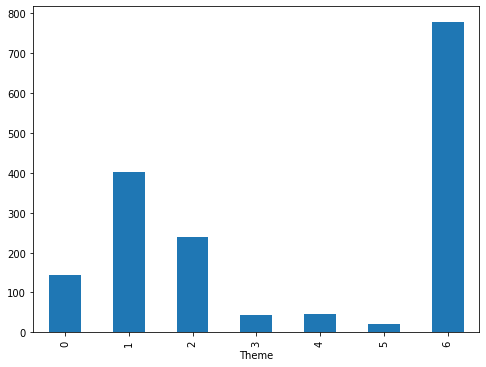

In [ ]:
fig = plt.figure(figsize=(8,6))
mrkdf.groupby('Theme')['Comment Text'].count().plot.bar(ylim=0)
plt.show()
# Numbers of marked comments by Themes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mrkdf['Lemmas'], mrkdf['Theme'], random_state = 0, train_size=0.8, test_size=0.2)
print('Обучающая и тестовая выборка кол-во (выкинули с пустой леммой):', len(X_train), len(X_test))

Обучающая и тестовая выборка кол-во (выкинули с пустой леммой): 1340 336


In [ ]:
# Create and learn model
X_train_tfidf = tfidf.transform(X_train)
clf =  LinearSVC().fit(X_train_tfidf, y_train)
X_train_tfidf.shape

(1340, 20115)

In [ ]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test)
print(clf.score(X_test_tfidf, y_test), X_test_tfidf.shape)
report = classification_report(y_test, clf.predict(X_test_tfidf), range(7)) # !!
print(report)

0.6190476190476191 (336, 20115)
              precision    recall  f1-score   support

           0       0.47      0.32      0.38        25
           1       0.48      0.53      0.51        73
           2       0.31      0.14      0.20        35
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6
           6       0.70      0.85      0.77       183

    accuracy                           0.62       336
   macro avg       0.28      0.26      0.26       336
weighted avg       0.55      0.62      0.58       336



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


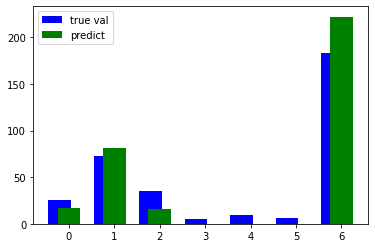

In [ ]:
a, b = np.unique(y_test, return_counts=True)
c, d = np.unique(clf.predict(X_test_tfidf), return_counts=True)
ax = plt.subplot(111)
ax.bar(a-0.2, b, width=0.5, color='b', align='center', label='true val')
ax.bar(c, d, width=0.5, color='g', align='center', label='predict')
ax.legend()
plt.show()
# Numbers of marked and predicted comments by Themes

# Lets look what with new coments??

In [ ]:
mrkdf2 = pd.read_excel(project_dir + 'NEURONET/2140comms.xlsx')
mrkdf2.head()

,dindex,Comment Text,Theme,Likes,Reply count
0,150010,"\""Были бы под американцами\""(с) - 1. Интересно...",0,NaN,NaN
1,139224,"Спасибо! А то подростки глупенькие , все стали...",2,NaN,NaN
2,82083,От куда у тебя только ненависть к Сталину?начи...,0,NaN,NaN
3,55066,Ну так. Я это и так все знала. Может только д...,2,NaN,NaN
4,99270,Нормы питания заключенных ГУЛАГов и оплата тру...,0,NaN,NaN


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.loc[mrkdf2.dindex]['Lemmas'], mrkdf2['Theme'], random_state = 0, train_size=0.7, test_size=0.3)
X_train_tfidf2 = tfidf.transform(X_train2)

print('Обучающая и тестовая выборка кол-во (выкинули с пустой леммой):', len(X_train2), len(X_test2))

Обучающая и тестовая выборка кол-во (выкинули с пустой леммой): 294 126


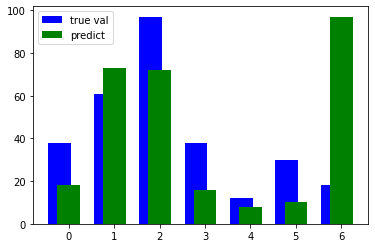

In [ ]:
a, b = np.unique(y_train2, return_counts=True)
c, d = np.unique(clf.predict(X_train_tfidf2), return_counts=True)
ax = plt.subplot(111)
ax.bar(a-0.2, b, width=0.5, color='b', align='center', label='true val')
ax.bar(c, d, width=0.5, color='g', align='center', label='predict')
ax.legend()
plt.show()

На графике видно, что 6 темы в разметке получилось очень мало благодаря умному отбору выборки - это как раз то что мы хотели. Так же видно что старая модель наоборот много коментариев ошибочно записывает в тему 6.** (почему?? - ведь изначально у нас коментарии без 6 темы по предсказаниям, но дело в том, что мы обучаемся на 0.8% от всей выборки1)
Теперь посмотрим как модель предсказывает коментарии из новой выборки 0.44% Ожидаймо плохо, так как мы взяли самые сомнительные коментарии. Давайте дообучем модель и посмотрим на сколько она станет лучше на нашей прошлой тестовой выборке

In [ ]:
X_test_tfidf = tfidf.transform(X_test2)
print("Качество старой модели (которя обучена на 1300 коментов), на новых коментах еще хуже:", clf.score(X_test_tfidf, y_test2))
report = classification_report(y_test2, clf.predict(X_test_tfidf), range(7))
print(report)

Качество старой модели (которя обучена на 1300 коментов), на новых коментах еще хуже: 0.2857142857142857
              precision    recall  f1-score   support

           0       0.10      0.08      0.09        12
           1       0.32      0.41      0.36        32
           2       0.36      0.26      0.30        39
           3       0.67      0.31      0.42        13
           4       0.83      0.50      0.62        10
           5       1.00      0.07      0.13        14
           6       0.06      0.33      0.10         6

    accuracy                           0.29       126
   macro avg       0.48      0.28      0.29       126
weighted avg       0.45      0.29      0.30       126



### Давайте занаво обучим модель на X_train и на X_train2 и на X_test2

In [ ]:
X_train_tfidf = tfidf.transform(np.hstack([X_train, df.loc[mrkdf2.dindex]['Lemmas']]))
clf =  LinearSVC().fit(X_train_tfidf, np.hstack([y_train, mrkdf2['Theme']])) # Create new model for all coments


X_test_tfidf = tfidf.transform(X_test)
print(clf.score(X_test_tfidf, y_test), 'Обучаемся на матрице:', X_train_tfidf.shape)
report = classification_report(y_test, clf.predict(X_test_tfidf), range(7))
print(report)

0.6517857142857143 Обучаемся на матрице: (1760, 20115)
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        25
           1       0.50      0.55      0.52        73
           2       0.31      0.31      0.31        35
           3       1.00      0.40      0.57         5
           4       1.00      0.11      0.20         9
           5       1.00      0.50      0.67         6
           6       0.77      0.83      0.80       183

    accuracy                           0.65       336
   macro avg       0.74      0.44      0.51       336
weighted avg       0.66      0.65      0.64       336



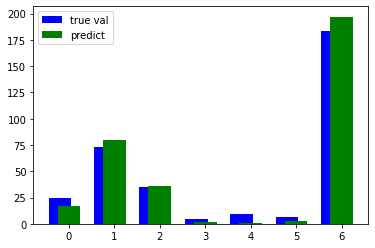

In [ ]:
a, b = np.unique(y_test, return_counts=True)
c, d = np.unique(clf.predict(X_test_tfidf), return_counts=True)
ax = plt.subplot(111)
ax.bar(a-0.2, b, width=0.5, color='b', align='center', label='true val')
ax.bar(c, d, width=0.5, color='g', align='center', label='predict')
ax.legend()
plt.show()

Отлично, качество улучшилось!! До 65 причем оно улучшилось в классах со 2го по 5й... Так что обучим модель на всех коментариях и все. Смотри самый конец

# Try to make our model better


1.    Classify more data by clever iterative choice.
2.    Use classifire by key words.


## 1) Classify more data by clever iterative choice.

In [ ]:
n_ind = np.random.randint(1, 166699, 10000)
new_coments = df['Lemmas'].loc[n_ind]

In [ ]:
# Learn our model on all coments
X_train_counts = count_vect.transform(mrkdf['Lemmas'])
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
clf =  LinearSVC().fit(X_train_tfidf, mrkdf['Theme'] - 1)

In [ ]:
def get_svc_proba(clf, X_test): #X_test_tfidf
  predict = clf.decision_function(X_test) + 10 #[clf.predict(X_test_tfidf)]
  predict = predict / np.sum(predict, 1).reshape(-1,1)
  return np.max(predict, 1)

new_coments_df = pd.DataFrame(new_coments, columns=['Coments', 'pred_themes', 'probs'])
new_coments_df['Coments'] = df['Comment Text'].loc[n_ind]

In [ ]:
X_test_counts = count_vect.transform(new_coments)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
new_coments_df['pred_themes'] = clf.predict(X_test_tfidf)
new_coments_df['probs'] = get_svc_proba(clf, X_test_tfidf)

In [ ]:
#new_coments_df.to_excel(project_dir + '/NEURONET/new_coments_to_mark.xlsx')


Сейчас мы покажем что мы еще пытались сделать и почему оставили модель выше. Во первых используем k-fold (разбиение на кусочки и предсказание одного кусочка по обучению на остальных), что бы максимально оценить качество разных моделей. Мы берем 4 модели.

In [ ]:
from scipy import sparse
features = (tfidf.transform(mrkdf['Lemmas']).toarray()) # maybe try  sparse.csr_matrix()
labels = mrkdf['Theme']
print(features.shape)

(1676, 20115)


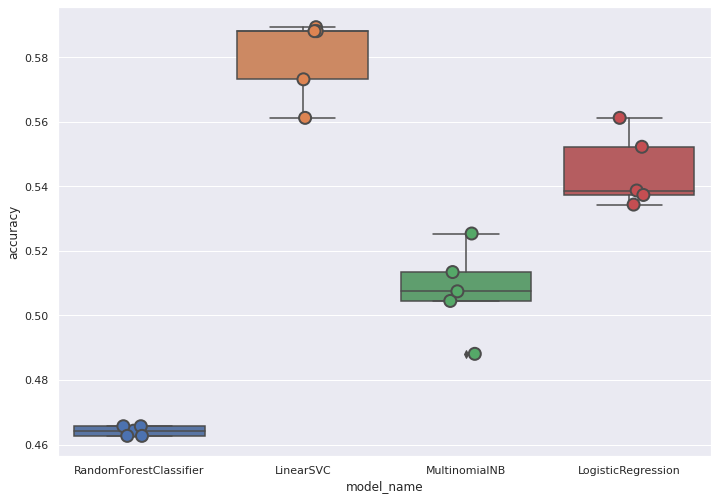

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Size of graph
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## 2) Coment by key words
Попробуем признаками сделать ключевые слова, которые мы подобрали для каждой темы. Мы будем искать соостветствие в лемматизированных словах, поэтому наши ключевые слова тоже нужно лемматизировать


In [ ]:
# read and lemmatize key words
with open(project_dir + 'MARKERS.txt') as kw: #'/NEURONET/nkw.txt') as kw:
  key_w = kw.read()

key_w

'тема0: Воспоминания о сталинской эпохе: Сталин, сталинские репрессии, сталинские_репрессии, при сталине, при_сталине, КГБ, расстрел, раСтрел, жертвы_репрессий, жертвы репрессий, голодомор, ужасы_гулага, поднял_страну, поднял страну, повторение, донос, воля_к_жизни, воля к жизни, Троцкий, концлагерь, смотрю и плачу, смотрю_и_плачу, исторический музей, исторический_музей, распутица, Сталина на вас не хватает, Сталина_на_вас_не_хватает, история_повторяется, история повторяется, безнаказанность, допустить_повторения, допустить повторения, вождь, солженицын, холодная_война, Ленин, холодная_война, развал СССР, развал_СССР, индустриализация, союз развалили, союз_развалили, биполярный мир, биполярный_мир, советский строй, советский_строй, гонка вооружений, гонка_вооружений, октябрьская революция, октябрьская_революция, большевики, Кутузов, сверхдержава, советская история, красный терор, красный террор, пролетариат, советская_история, сейчас также, железный занавес, железный_занавес, развал ст

In [ ]:
kw = """
тема1: сталинские времена: Сталин, Ленин, КГБ, расстрел, голодомор, ВОВ, вторая_мировая, вторая мировая, донос, ГУЛАГ, исторический музей, исторический_музей

тема2: полемика о СССР: союз, СССР, солженицын, холодная_война, холодная_война, развал СССР, развал_СССР, индустриализация, союз развалили, союз_развалили, биполярный мир, биполярный_мир, НКВД, советский строй, советский_строй, гонка вооружений, гонка_вооружений, октябрьская революция, октябрьская_революция, большевики, троцкий, красный террор, красный_террор, Кутузов, пакт молотова-риббентропа, пакт_молотова_риббентропа, сверхдержава, советская история, советская_история, очернить, а сейчас лучше, а_сейчас_лучше, сейчас также, сейчас_также, железный занавес, железный_занавес, либерасты, развал страны, развал_страны, обрабатывают молодых, обраб_молодых, Королев, антисоветчина, антисоветский, совок, совка, наша память

тема3: социальные, экономические, политические проблемы РФ: Навальный, Дуров, Соболев, благосостояние, прогресс, стагнация, рецессия, экономика, правительство, деградация, плохие дороги, плохие_дороги, уровень жизни, уровень_жизни, ворьё, нечестные выборы, нечестные_выборы, бедность, нищета, нефть, газ, московский мусор, московский_мусор, выборы в мосгор думу, выборы_в_мосгор_думу, собянин, митинг, а_сегодня, русский мир, русский_мир, за мкадом, за_мкадом, за Уралом, за_Уралом, современная Россия, независимая_Россия, лихие 90е, лихие _90е, Ельцин, Кадыров, Соловьев, Киселев, гнилая журналистика, гнилая _журналистика, ВВП, беспредел, коррупция, оппозиция, глубинка, социальные проблемы, холодильник, наше время, наше_время, роснано, чеченский конфликт, чеченский_конфликт

Тема4: обсуждение политики Путина: путинские, Путин, воровство, продажная власть, продажная_власть, указ президента, указ_президента, плешивый, президент, авторитарный режим, авторитарный_режим, несменяемый, национальное богатство, национальное_богатство, несменяемость власти, несменяемость_власти, фальсификация, диктатор, геополитика, наш президент, наш_президент, путинисты, поднял с колен, поднял_с_колен, олигарх, крымский мост, крымский_мост

тема5: отношения РФ с западом: Сша, Европа, западные ценности, западные_ценности, америкa, инновации, нато, трамп, байден, права человека, права_человека, меркель, санкции, доллар, северный поток, северный_поток_2, лгбт, мировая политика, мировая_политика, ООН, запад, либерал, , либеральный

тема6: отношения РФ ближними соседями: Украина, Беларусь, Армения, постсоветские страны, постсоветские_страны, СНГ, рука кремля, рука_кремля, Тихановская, национальные интересы, национальные_интересы, белорус, сепаратист, бандеровцы, цветная революция, цветная_революция, Донбасс, Луганск, Зеленский, жыве беларусь, жыве_беларусь, белорусский протест, белорусский_протест, Лукашенко, батька, бульбаши, субсидии от России, субсидии_от_России, субсидии от рф, субсидии_от_рф, минские соглашения, минские_соглашения, пашинян, нарушение границ, нарушение_границ, анексия Крыма, анексия_Крыма, аннексия Крыма, аннексия_Крыма

тема7: иное: очень крутой, очень_крутой


"""
key_w = kw

In [ ]:
kw = """тема 0: сталинские времена: сталинские репрессии, сталинские_репрессии, при сталине, при_сталине, КГБ, расстрел, раСтрел, жертвы_репрессий, жертвы репрессий, голодомор, ужасы_гулага, поднял_страну, поднял страну, повторение, донос, воля_к_жизни, воля к жизни, концлагерь, смотрю и плачу, смотрю_и_плачу, исторический музей, исторический_музей, распутица, Сталина на вас не хватает, Сталина_на_вас_не_хватает, история_повторяется, история повторяется, безнаказанность, допустить_повторения, допустить повторения, вождь.

тема1: полемика о СССР: солженицын, холодная_война, Ленин, холодная_война, развал СССР, развал_СССР, индустриализация, союз развалили, союз_развалили, биполярный мир, биполярный_мир, НКВД, советский строй, советский_строй, гонка вооружений, гонка_вооружений, октябрьская революция, октябрьская_революция, большевики, троцкий, красный террор, красный_террор, Кутузов, пакт молотова-риббентропа, пакт_молотова_риббентропа, сверхдержава, советская история, советская_история, очернить, а сейчас лучше, а_сейчас_лучше, сейчас также, сейчас_также, железный занавес, железный_занавес, либерасты, развал страны, развал_страны, обрабатывают молодых, обраб_молодых, марксизм, Королев, антисоветчина, антисоветский, совок, совка, наша память.

тема2: социальные, экономические, политические проблемы РФ: Навальный, Дуров, Соболев, благосостояние, прогресс, стагнация, рецессия, экономика, правительство, деградация, плохие дороги, плохие_дороги, уровень жизни, уровень_жизни, ворьё, нечестные выборы, нечестные_выборы, бедность, нищета, нефть, газ, московский мусор, московский_мусор, выборы в мосгор думу, выборы_в_мосгор_думу, собянин, митинг, а_сегодня, русский мир, русский_мир, за мкадом, за_мкадом, за Уралом, за_Уралом, современная Россия, независимая_Россия, лихие 90е, лихие _90е, Ельцин, Кадыров, Соловьев, Киселев, гнилая журналистика, гнилая _журналистика, ВВП, беспредел, коррупция, оппозиция, глубинка, социальные проблемы, холодильник, наше время, наше_время, роснано, чеченский конфликт, чеченский_конфликт.

Тема3: обсуждение политики Путина: путинские, Владимир Владимирович, Владимир_Владимирович, ВВ, воровство, чекист, продажная власть, продажная_власть, указ президента, указ_президента, плешивый, президент, авторитарный режим, авторитарный_режим, несменяемый, национальное богатство, национальное_богатство, несменяемость власти, несменяемость_власти, фальсификация, диктатор, геополитика, наш президент, наш_президент, путинисты, поднял с колен, поднял_с_колен, олигарх, крымский мост, крымский_мост.

тема4: отношения РФ с западом: Сша, Европа, западные ценности, западные_ценности, америкос, федеральные каналы, федеральные_каналы, инновации, нато, трамп, байден, права человека, права_человека, меркель, санкции, доллар, северный поток 2, северный_поток_2, дисквалификация, демократия, демократический, Лавров, виза, нападки запада, нападки_запада, пиндос, лгбт, мировая политика, мировая_политика, ООН, гнилой запад, гнилой_запад, либеральные ценности, либеральные_ценности, свободное общество, свободное_общество, изоляция, либерал, либеральный, западная пропаганда, западная_пропаганда.

тема5: отношения РФ ближними соседями: Украина, Беларусь, Армения, постсоветские страны, постсоветские_страны, СНГ, рука кремля, рука_кремля, Тихановская, национальные интересы, национальные_интересы, война на Украине, война _на_Украине, белорус, сепаратист, бандеровцы, цветная революция, цветная_революция, Донбасс, Луганск, Зеленский, жыве беларусь, жыве_беларусь, белорусский протест, белорусский_протест, Лукашенко, батька, бульбаши, субсидии от России, субсидии_от_России, субсидии от рф, субсидии_от_рф, минские соглашения, минские_соглашения, пашинян, нарушение границ, нарушение_границ, анексия Крыма, анексия_Крыма, аннексия Крыма, аннексия_Крыма.

тема6: иное:  спасики Дуди"""
key_w = kw

In [ ]:


key_words = {}
for theme in key_w.split('\n'):
  if theme in ['', '\t', ' ']:
    continue
  #print(theme, theme.split(':'))
  n, name, words = theme.split(':')
  #print(words.split(','))
  key_words[int(n[-1])] = [name]
  for w in words.split(','):
    if len(w.split()) > 1 and '_' not in w:
      #print(lemma)
      lemma = lemmatization([w.split()])
      if lemma[0] == '':
        continue
      #bgr = '_'.join(lemma[0].split())
      #key_words[int(n[-1])].append(bgr)
      key_words[int(n[-1])].append(lemma[0])
    elif '_' in w:
      key_words[int(n[-1])].append(w)
    else:
      lemma = lemmatization([w.split()])
      if lemma[0] == '':
        continue
      key_words[int(n[-1])].append(lemma[0])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mrkdf['Lemmas'], mrkdf['Theme'], random_state = 1, train_size=0.8, test_size=0.2)

In [ ]:
# ccount words in train set themes, count words in full text. Show histo for each theme, how many words in all coments. How many coments whith theme 7


In [ ]:
import numpy as np

def count_key_words(data_lemmatized, key_words):
  themes = np.zeros([len(data_lemmatized), len(key_words)])

  for i, coment in enumerate(data_lemmatized):
    #if i > 10: break
    #print(coment)
    for k in key_words:
      for w in key_words[k][1:]:
        if w in coment:
          #print('s', i, w, k)
          themes[i, k-1] += 1 # or = 1
  return themes


def mark_key_words(data_lemmatized, key_words=key_words, n=None):
  themes = np.zeros([len(data_lemmatized[:n]), len(key_words)])

  for i, coment in enumerate(data_lemmatized[:n]):
    #if i > 10: break
    #print(coment)
    for k in key_words:
      for w in key_words[k][1:]:
        #print(w)
        if w in coment:
          #if len(w.split()) > 1:
          #  print('s', i, w, k, coment)
          themes[i, k-1] = 1 # or = 1
  return themes


#themes = mark_key_words(mrkdf['Lemmas'], key_words, n=None) # add 2 to check
themes = mark_key_words(X_test)#, key_words, n=None)
themes.shape, np.sum(themes)

((336, 7), 84.0)

In [ ]:
nw = {}
for k in key_words:
  nw[k] = []
  for w in key_words[k]:
    if w[0] == ' ':
      w = w[1:]
    nw[k].append(w)

key_words = nw

In [ ]:
key_words[1]

['полемика о СССР',
 'солженицын',
 'холодная_война',
 'холодная_война',
 'развал',
 'развал_СССР',
 'индустриализация',
 'союз развалять',
 'союз_развалили',
 'биполярный мир',
 'биполярный_мир',
 'нквд',
 'советский строй',
 'советский_строй',
 'гонка вооружение',
 'гонка_вооружений',
 'октябрьский революция',
 'октябрьская_революция',
 'большевик',
 'троцкий',
 'красный террор',
 'красный_террор',
 'пакт молотов риббентроп',
 'пакт_молотова_риббентропа',
 'сверхдержава',
 'советский история',
 'советская_история',
 'очернить',
 'сейчас хороший',
 'а_сейчас_лучше',
 'сейчас также',
 'сейчас_также',
 'железный занавес',
 'железный_занавес',
 'либераст',
 'развал страна',
 'развал_страны',
 'обрабатывать молодой',
 'обраб_молодых',
 'марксизм',
 'антисоветчина',
 'антисоветский',
 'совок',
 'совка',
 'память']

В обучающей выборке у нас не так много коментариев в которых попадаются ключевые слова. Проблема в том, что если мы делаем много ключевых слов к каждой теме, то они начинают попадаться в коментариях по другим темам. Если мы делаем мало ключевых слов по данной теме, то многие коментарии данной темы не содержат вообще ключевых слов. Ниже приведен график по оси х коментарий (первые 200) а по оси у сколько тем он содержит (по ключевым словам) Далее для подбора ключевых слов была сделана мягкая оценка - функция mark_coment отмечает все темы в коментарии (если встретились ключевые слова из данной темы) а multi_score считает ответ правельным если настоящий ответ совпал хоть с одной из предсказанных тем, но без темы 6. Получилась точность 39% у усеченных слов и 36% у начальных. (Почему точность возросла если слов стало меньше, дело в том что мы учитываем только те случаи на которые модель дала ответ, соответственно если слов меньше ответов тоже меньше - а это знаменатель в нормировке)  Так же возрасла точность определения каждой темы кроме 0й. 0.46938776, 0.37588652, 0.51515152, 0.4375    , 0.4  , 0.16666667, 0.11538462.

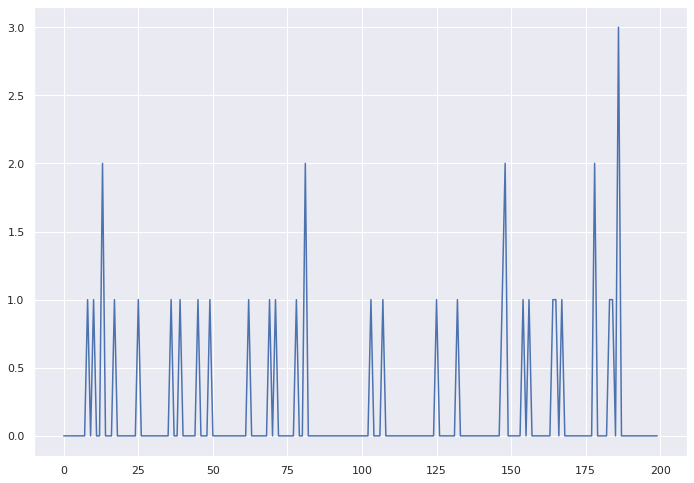

In [ ]:
plt.plot(np.sum(themes, axis=1)[:200])

In [ ]:
len(themes), len(y_test), len(themes), y_test.shape

(336, 336, 336, (336,))

In [ ]:
# Special metric
from collections import defaultdict

def mark_coment(themes):
  predict_themes = []
  for cline in themes:
    predict_themes.append(np.where(cline != 0))
  return predict_themes

predict_themes = mark_coment(themes)

def multi_score(y_test=mrkdf['Theme'], pred=predict_themes):
  sc = 0
  smpl = 0
  stat = defaultdict(list)
  for i, t in enumerate(y_test):
    if len(predict_themes[i][0]) == 0:
      continue
    smpl += 1
    #print(t, predict_themes[i][0])
    stat[t].append(predict_themes[i][0])
    if t in predict_themes[i][0]:
      sc += 1
  print(sc/smpl)
  res = np.zeros(7)
  for k in stat:
    ntnull = 0
    for s in stat[k]:
      if len(s) > 0:
        ntnull += 1
      if k in s:
          if k==5 : print(k, s, res[k], ntnull)
          res[k] += 1
    res[k] /= ntnull
  return stat, res


multi_score(y_test, themes)[1]

0.36507936507936506


array([0.28571429, 0.375     , 0.33333333, 0.57142857, 0.        ,
       0.        , 0.4       ])

In [ ]:
y_test

1159    6
1059    6
1014    6
1137    6
1229    6
       ..
962     6
61      6
682     6
1459    6
322     6
Name: Theme, Length: 336, dtype: int64

In [ ]:
predict_themes[21]

(array([0, 5]),)

In [ ]:
sum(themes[:, 3])

1.0

In [ ]:
tkw=2
for k in key_words[tkw][1:]:
  for i, c in enumerate(X_test):
    if k in c and list(y_test)[i] == tkw:
      print(k, 'com:', themes[i], i, list(y_test)[i], c)
  #break

экономика com: [0. 1. 0. 0. 0. 0. 0.] 301 2 муратов здравомыслящий человек нормальный человек текущий положение дело призывать возвращаться прошлое твердо взглянуть будущее представить тысяча переехать человек время человек вернуться запустить жернов производство экономика миллион человек получить работа достоиный оплата увеличить прожиточный минимум старушка ходить помоик говорить родной распространять мир прекрасно
бедность com: [0. 1. 0. 0. 0. 0. 0.] 50 2 очень информировать пенсионерка врать поди мерять сегодняшний лекал условие жизнь послевоенный страна чистеиший манипуляция менее разбираться цифра сеичас жить человек чертой бедность едва сводить конец конец
бедность com: [0. 1. 0. 0. 0. 0. 0.] 183 2 россия родина крах бедность
время com: [1. 1. 0. 0. 0. 0. 0.] 158 2 распорежаться напливать блять начинаться идиот марксистский хует начинать повторять освоить элементарный грамотность первый капитализм конкуренция свободный рынок загнуться барьер государство этакий лаит версия совка 

In [ ]:
features_mrk = mark_key_words(mrkdf['Lemmas'], key_words, n=None) # np.hstack([features, themes]) #themes#np.hstack([features, themes])
features = tfidf.transform(mrkdf['Lemmas'])
features2 = sparse.hstack([sparse.csr_matrix(features_mrk), features])
labels = mrkdf["Theme"]
features2.shape

NameError: ignored

In [ ]:
# k-fold -see in wiki

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features_mrk, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## Объединенная модель

In [ ]:
# k-fold -see in wiki

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features2, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
# from sklearn.metrics import recall_score, precision_score, f1_score
clf =  LinearSVC().fit(mark_key_words(X_train, key_words), y_train)
X_tst = mark_key_words(X_test, key_words, n=None)
print(clf.score(X_tst, y_test))
report = classification_report(y_test, clf.predict(X_tst), range(7))
print(report)

## Делаем табличку с классами и вероятностями от двух моделей.

In [ ]:
#дву моделей : tf-idf и k-word

In [ ]:
stats_df = pd.DataFrame(mrkdf.loc[X_test.index][['Comment Text', 'Theme']], columns=['Comment Text', 'Theme', 'pred_tf', 'pred_tf_prob', 'pred_keyword', 'pred_keyword_prob'])


In [ ]:
def get_svc_proba(clf, X_test): #X_test_tfidf
  predict = clf.decision_function(X_test) + 10 #[clf.predict(X_test_tfidf)]
  predict = predict / np.sum(predict, 1).reshape(-1,1)
  return np.max(predict, 1)

In [ ]:
Xtr = count_vect.transform(X_train)
Xtr = tfidf_transformer.transform(Xtr)
clf =  LinearSVC().fit(Xtr, y_train)

Xtr = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(Xtr)


stats_df['pred_tf_prob'] = get_svc_proba(clf, X_test_tfidf)
stats_df['pred_tf'] = clf.predict(X_test_tfidf)

clf =  LinearSVC().fit(mark_key_words(X_train, key_words, n=None), y_train)
test_keyw_feuters = mark_key_words(X_test, key_words, n=None)
stats_df['pred_keyword_prob'] = get_svc_proba(clf, test_keyw_feuters)
stats_df['pred_keyword'] = clf.predict(test_keyw_feuters)
if max(stats_df['Theme']) == 7:
  stats_df['Theme'] -= 1

In [ ]:
stats_df

In [ ]:
stats_df[stats_df['Theme'] != 6]

In [ ]:
stats_df.to_excel(project_dir + 'NEURONET/ComentsProb1.xlsx')

# Объеденим модели: обучаем модель на X_train с tf-idf and k-words


In [ ]:

sA = sparse.csr_matrix(mark_key_words(X_train))
features2.shape, sparse.hstack([sA, tfidf.transform(X_train)]).shape

In [ ]:
X_tr_tfidf = tfidf.transform(X_train)
clf =  LinearSVC().fit(sparse.hstack([sA, X_tr_tfidf]), y_train)
#clf =  LinearSVC().fit(np.hstack([mark_key_words(X_train), X_tr_tfidf]), y_train)
X_tst = mark_key_words(X_test, key_words, n=None)
X_test_tfidf = tfidf.transform(X_test)
print(clf.score(sparse.hstack([sparse.csr_matrix(X_tst), X_test_tfidf]), y_test))
report = classification_report(clf.predict(sparse.hstack([sparse.csr_matrix(X_tst), X_test_tfidf])), y_test, range(7))
print(report)

У объединенной модели результат оказался лучше!! А с новой выборкой, еще лучше!

In [ ]:
all_train = np.hstack([X_train, df.loc[mrkdf2.dindex]['Lemmas']])
sA = sparse.csr_matrix(mark_key_words(all_train))
X_tr_tfidf = tfidf.transform(all_train)
clf =  LinearSVC().fit(sparse.hstack([sA, X_tr_tfidf]), np.hstack([y_train, mrkdf2['Theme']]))
#clf =  LinearSVC().fit(np.hstack([mark_key_words(X_train), X_tr_tfidf]), y_train)
X_tst = mark_key_words(X_test, key_words, n=None)
X_test_tfidf = tfidf.transform(X_test)
print(clf.score(sparse.hstack([sparse.csr_matrix(X_tst), X_test_tfidf]), y_test))
report = classification_report(clf.predict(sparse.hstack([sparse.csr_matrix(X_tst), X_test_tfidf])), y_test, range(7))#???????????????
print(report)

# Model compose tfidf + keyword. Not needed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
X_train, X_test, y_train, y_test = train_test_split(mrkdf['Lemmas'], mrkdf['Theme'] - 1, random_state = 0)

class MyModel(BaseEstimator):
  # Add weight and search count in Coments
  def __init__(self):
    self.count_vect = CountVectorizer()
    self.tfidf_transformer = tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words=russian_stopwords)
    #tfidf#TfidfTransformer()
    self.clf = LogisticRegression()

  def fit(self, X, y, **kwargs):
    X_tfidf = self.tfidf_transformer.fit_transform(X)
    X_features = self.transform(X, X_tfidf)
    #print(X_features.shape)
    self.clf.fit(X_features, y)
    return self

  def transform(self, X, X_tfidf):
    # Add key words counts
    themes = mark_key_words(X, key_words, n=None)
    n_comment_wth_k(themes) # show distribution
    #print(themes.shape, X_tfidf.shape)
    return X_tfidf.toarray()# np.hstack([themes, X_tfidf.toarray()])

  def decision_function(self, X):
    return self.predict(X)

  def predict(self, X):
    #X_counts = self.count_vect.transform(3)#X)
    X_tfidf = self.tfidf_transformer.transform(X)#_counts)
    X_features = self.transform(X, X_tfidf)
    #print(X_features.shape)
    return self.clf.predict(X_features)

  def predict_proba(self, X):
    X_tfidf = self.tfidf_transformer.transform(X)#_counts)
    X_features = self.transform(X, X_tfidf)
    #print(X_features.shape)
    return self.clf.predict_proba(X_features)




mm = MyModel()
mm.fit(X_train, y_train)
accuracy_score(mm.predict((X_test)), y_test)
#lrg = LogisticRegression()
#cross_val_score(mm, df["Lemmas"], labels, scoring='accuracy', cv=3, )
mm.predict_proba((X_test))[:10], y_test[:10]

In [ ]:
import numpy as np
#from sklearn.cross_validation import cross_val_score



In [ ]:
print(clf.predict(count_vect.transform(["После слов вахтерши на всякий случай пошёл спать."])))


In [ ]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

def transf_data(X_train):
  X_train_counts = count_vect.transform(X_train)
  X_train_tfidf = tfidf_transformer.transform(X_train_counts)
  return X_train_tfidf

clf = LinearSVC().fit(X_train_tfidf, y_train)
clf.score(transf_data(X_test), y_test)

# Use Double model for all unmarked comments and visualize results
Train on both marked df

In [ ]:
np.random.seed(1)
X_train_all = np.hstack([mrkdf['Lemmas'], df.loc[mrkdf2.dindex]['Lemmas']])
sA = sparse.csr_matrix(mark_key_words(X_train_all))
X_train_tfidf = tfidf.transform(X_train_all)
clf =  LinearSVC().fit(sparse.hstack([sA, X_train_tfidf]), np.hstack([mrkdf['Theme'], mrkdf2['Theme']]))



In [ ]:
def get_svc_proba(clf, X_test): #X_test_tfidf
  predict = clf.decision_function(X_test) + 10 #[clf.predict(X_test_tfidf)]
  predict = predict / np.sum(predict, 1).reshape(-1,1)
  return predict


#X_tf_idf = tfidf.transform(df[df['type'] != 2]['Lemmas'])
#sA = sparse.csr_matrix(mark_key_words(df[df['type'] != 2]['Lemmas']))
X_tf_idf = tfidf.transform(df['Lemmas'])
sA = sparse.csr_matrix(mark_key_words(df['Lemmas']))
X_all_pred = sparse.hstack([sA, X_tf_idf])
%time result = get_svc_proba(clf, X_all_pred)

In [ ]:
result.shape

In [ ]:
np.argmax(result, 1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xy = pca.fit_transform(result)

In [ ]:
import seaborn as sns
#sns.set_theme(style="white")
sns.set_theme(color_codes=True)

i=7000
fig, ax = plt.subplots(figsize=[12,10])
y = np.argmax(result[:i], 1)
#scatter = ax.scatter(xy[:i,0], xy[:i,1], c=np.argmax(result[:i], 1), cmap='Spectral')
scatter = ax.scatter(xy[:i,0], xy[:i,1], c=y, cmap='Spectral')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [ ]:
df['predThemes'] = np.argmax(result, 1)
df['predThemes_prob'] = np.max(result, 1)
df.to_excel(project_dir + 'NEURONET/AllPred2.xlsx')

На графику видно что тема 6 имеет достаточно много коментариев которые довольно хорошо отделяются от остальных тем, так тема 0 имеет коментарии исключительно своей темы. Остальные же коментарии довольно сложно различимы в том числе из - за своей малочисленности.

Еще один график - давайте возьмем всех тем в равном количестве

In [ ]:
#df['predThemes'] = np.argmax(result, 1)
#df.to_excel(project_dir + 'NEURONET/AllPred.xlsx')

In [ ]:
X_train = None
y = None
for i in range(7):
  a = df[df['predThemes']==i].index
  print(a.shape)
  ind = np.random.randint(0, len(a), 500)

  if X_train is None:
    X_train = result[a[ind]]
    y = [i] * len(a[ind])
  else:
    X_train = np.vstack([X_train, result[a[ind]]])
    y = np.hstack([y, [i] * len(a[ind])])

In [ ]:
X_train.shape

In [ ]:
pca = PCA(n_components=2)
xy = pca.fit_transform(X_train)

In [ ]:
y.shape

In [ ]:
import seaborn as sns
#sns.set_theme(style="white")
sns.set_theme(color_codes=True)

i=7000
fig, ax = plt.subplots(figsize=[12,10])

#scatter = ax.scatter(xy[:i,0], xy[:i,1], c=np.argmax(result[:i], 1), cmap='Spectral')
scatter = ax.scatter(xy[:i,0], xy[:i,1], c=y, cmap='Spectral')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

Подсчитаем количество мата. Фильтрация в вк 600 слов

In [ ]:
mat = """6ля, 6лядь, 6лять, b3ъeб, cock, cunt, e6aль, ebal, eblan, eбaл, eбaть, eбyч, eбать, eбёт, eблантий, fuck, fucker, fucking, xyёв, xyй, xyя, xуе,xуй, xую, zaeb, zaebal, zaebali, zaebat, архипиздрит, ахуел, ахуеть, бздение, бздеть, бздех, бздецы, бздит, бздицы, бздло, бзднуть, бздун, бздунья, бздюха, бздюшка, бздюшко, бля, блябу, блябуду, бляд, бляди, блядина, блядище, блядки, блядовать, блядство, блядун, блядуны, блядунья, блядь, блядюга, блять, вафел, вафлёр, взъебка, взьебка, взьебывать, въеб, въебался, въебенн, въебусь, въебывать, выблядок, выблядыш, выеб, выебать, выебен, выебнулся, выебон, выебываться, выпердеть, высраться, выссаться, вьебен, гавно, гавнюк, гавнючка, гамно, гандон, гнид, гнида, гниды, говенка, говенный, говешка, говназия, говнецо, говнище, говно, говноед, говнолинк, говночист, говнюк, говнюха, говнядина, говняк, говняный, говнять, гондон, доебываться, долбоеб, долбоёб, долбоящер, дрисня, дрист, дристануть, дристать, дристун, дристуха, дрочелло, дрочена, дрочила, дрочилка, дрочистый, дрочить, дрочка, дрочун, е6ал, е6ут, еб твою мать, ёб твою мать, ёбaн, ебaть, ебyч, ебал, ебало, ебальник, ебан, ебанамать, ебанат, ебаная, ёбаная, ебанический, ебанный, ебанныйврот, ебаное, ебануть, ебануться, ёбаную, ебаный, ебанько, ебарь, ебат, ёбат, ебатория, ебать, ебать-копать, ебаться, ебашить, ебёна, ебет, ебёт, ебец, ебик, ебин, ебись, ебическая, ебки, ебла, еблан, ебливый, еблище, ебло, еблыст, ебля, ёбн, ебнуть, ебнуться, ебня, ебошить, ебская, ебский, ебтвоюмать, ебун, ебут, ебуч, ебуче, ебучее, ебучий, ебучим, ебущ, ебырь, елда, елдак, елдачить, жопа, жопу, заговнять, задрачивать, задристать, задрота, зае6, заё6, заеб, заёб, заеба, заебал, заебанец, заебастая, заебастый, заебать, заебаться, заебашить, заебистое, заёбистое, заебистые, заёбистые, заебистый, заёбистый, заебись, заебошить, заебываться, залуп, залупа, залупаться, залупить, залупиться, замудохаться, запиздячить, засерать, засерун, засеря, засирать, засрун, захуячить, заябестая, злоеб, злоебучая, злоебучее, злоебучий, ибанамат, ибонех, изговнять, изговняться, изъебнуться, ипать, ипаться, ипаццо, Какдвапальцаобоссать, конча, курва, курвятник, лох, лошарa, лошара, лошары, лошок, лярва, малафья, манда, мандавошек, мандавошка, мандавошки, мандей, мандень, мандеть, мандища, мандой, манду, мандюк, минет, минетчик, минетчица, млять, мокрощелка, мокрощёлка, мразь, мудak, мудaк, мудаг, мудак, муде, мудель, мудеть, муди, мудил, мудила, мудистый, мудня, мудоеб, мудозвон, мудоклюй, на хер, на хуй, набздел, набздеть, наговнять, надристать, надрочить, наебать, наебет, наебнуть, наебнуться, наебывать, напиздел, напиздели, напиздело, напиздили, насрать, настопиздить, нахер, нахрен, нахуй, нахуйник, не ебет, не ебёт, невротебучий, невъебенно, нехира, нехрен, Нехуй, нехуйственно, ниибацо, ниипацца, ниипаццо, ниипет, никуя, нихера, нихуя, обдристаться, обосранец, обосрать, обосцать, обосцаться, обсирать, объебос, обьебать обьебос, однохуйственно, опездал, опизде, опизденивающе, остоебенить, остопиздеть, отмудохать, отпиздить, отпиздячить, отпороть, отъебись, охуевательский, охуевать, охуевающий, охуел, охуенно, охуеньчик, охуеть, охуительно, охуительный, охуяньчик, охуячивать, охуячить, очкун, падла, падонки, падонок, паскуда, педерас, педик, педрик, педрила, педрилло, педрило, педрилы, пездень, пездит, пездишь, пездо, пездят, пердануть, пердеж, пердение, пердеть, пердильник, перднуть, пёрднуть, пердун, пердунец, пердунина, пердунья, пердуха, пердь, переёбок, пернуть, пёрнуть, пи3д, пи3де, пи3ду, пиzдец, пидар, пидарaс, пидарас, пидарасы, пидары, пидор, пидорасы, пидорка, пидорок, пидоры, пидрас, пизда, пиздануть, пиздануться, пиздарваньчик, пиздато, пиздатое, пиздатый, пизденка, пизденыш, пиздёныш, пиздеть, пиздец, пиздит, пиздить, пиздиться, пиздишь, пиздища, пиздище, пиздобол, пиздоболы, пиздобратия, пиздоватая, пиздоватый, пиздолиз, пиздонутые, пиздорванец, пиздорванка, пиздострадатель, пизду, пиздуй, пиздун, пиздунья, пизды, пиздюга, пиздюк, пиздюлина, пиздюля, пиздят, пиздячить, писбшки, писька, писькострадатель, писюн, писюшка, по хуй, по хую, подговнять, подонки, подонок, подъебнуть, подъебнуться, поебать, поебень, поёбываает, поскуда, посрать, потаскуха, потаскушка, похер, похерил, похерила, похерили, похеру, похрен, похрену, похуй, похуист, похуистка, похую, придурок, приебаться, припиздень, припизднутый, припиздюлина, пробзделся, проблядь, проеб, проебанка, проебать, промандеть, промудеть, пропизделся, пропиздеть, пропиздячить, раздолбай, разхуячить, разъеб, разъеба, разъебай, разъебать, распиздай, распиздеться, распиздяй, распиздяйство, распроеть, сволота, сволочь, сговнять, секель, серун, серька, сестроеб, сикель, сила, сирать, сирывать, соси, спиздел, спиздеть, спиздил, спиздила, спиздили, спиздит, спиздить, срака, сраку, сраный, сранье, срать, срун, ссака, ссышь, стерва, страхопиздище, сука, суки, суходрочка, сучара, сучий, сучка, сучко, сучонок, сучье, сцание, сцать, сцука, сцуки, сцуконах, сцуль, сцыха, сцышь, съебаться, сыкун, трахае6, трахаеб, трахаёб, трахатель, ублюдок, уебать, уёбища, уебище, уёбище, уебищное, уёбищное, уебк, уебки, уёбки, уебок, уёбок, урюк, усраться, ушлепок, х_у_я_р_а, хyё, хyй, хyйня, хамло, хер, херня, херовато, херовина, херовый, хитровыебанный, хитрожопый, хуeм, хуе, хуё, хуевато, хуёвенький, хуевина, хуево, хуевый, хуёвый, хуек, хуёк, хуел, хуем, хуенч, хуеныш, хуенький, хуеплет, хуеплёт, хуепромышленник, хуерик, хуерыло, хуесос, хуесоска, хуета, хуетень, хуею, хуи, хуй, хуйком, хуйло, хуйня, хуйрик, хуище, хуля, хую, хуюл, хуя, хуяк, хуякать, хуякнуть, хуяра, хуясе, хуячить, целка, чмо, чмошник, чмырь, шалава, шалавой, шараёбиться, шлюха, шлюхой, шлюшка, ябывает, , """

In [ ]:
kw =  mat.split(', ')

In [ ]:
from collections import defaultdict
mat_count = np.zeros_like(df['Comment Text'])
for i, com in enumerate(df['Comment Text']):
  for w in com.split():
    if w in kw:
      mat_count[i] += 1


In [ ]:
# all coments with mat and all mat words
np.sum(mat_count != 0), np.sum(mat_count), len(mat_count)

In [ ]:
'шлюха' in mat

# Word cloud and side model

In [ ]:
!pip3 install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_word_cloud(cluster=6):
    a = df[df['predThemes']==cluster].index
    ind = np.random.randint(0, len(a), 500)
    #text = df["Comment Text"][a[ind]]
    text = df["Lemmas"][a[ind]]

    text = text.str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    print("Theme", cluster)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for i in range(7):
  create_word_cloud(i)     # number is theme you could print key word for any theme
